# Analisis extra
Acá se analizan los datos por fuera de los requerimientos principales

Primero se procede con importar librerias y datos

In [154]:
#Importar librerias a usar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#CREACION DE FATA FRAMES
df_metadata = pd.read_csv("c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\EMMA\\data\\cleaned\\Tabla Normalizada - Metadata.csv")
df_data_type = pd.read_csv('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\EMMA\\data\\cleaned\\Tabla Normalizada - Data type.csv')
df_participants = pd.read_csv('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\EMMA\\data\\cleaned\\Tabla Normalizada - Participants.csv')
df_self_report = pd.read_csv('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\EMMA\\data\\cleaned\\Tabla Normalizada - Self report.csv')
df_emotion_elicitation_techniques = pd.read_csv('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\EMMA\\data\\cleaned\\Tabla Normalizada - Emotion elicitation techniques.csv')
df_eda = pd.read_csv('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\EMMA\\data\\cleaned\\Tabla Normalizada - EDA.csv')
df_statistical_learning_models = pd.read_csv('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\EMMA\\data\\cleaned\\Tabla Normalizada - Statistical Learning model.csv')
df_performances = pd.read_csv('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\EMMA\\data\\cleaned\\Tabla Normalizada - Performances.csv')

## 1. Frecuencia de papers por tipo de source (conference, journal, pre-print)

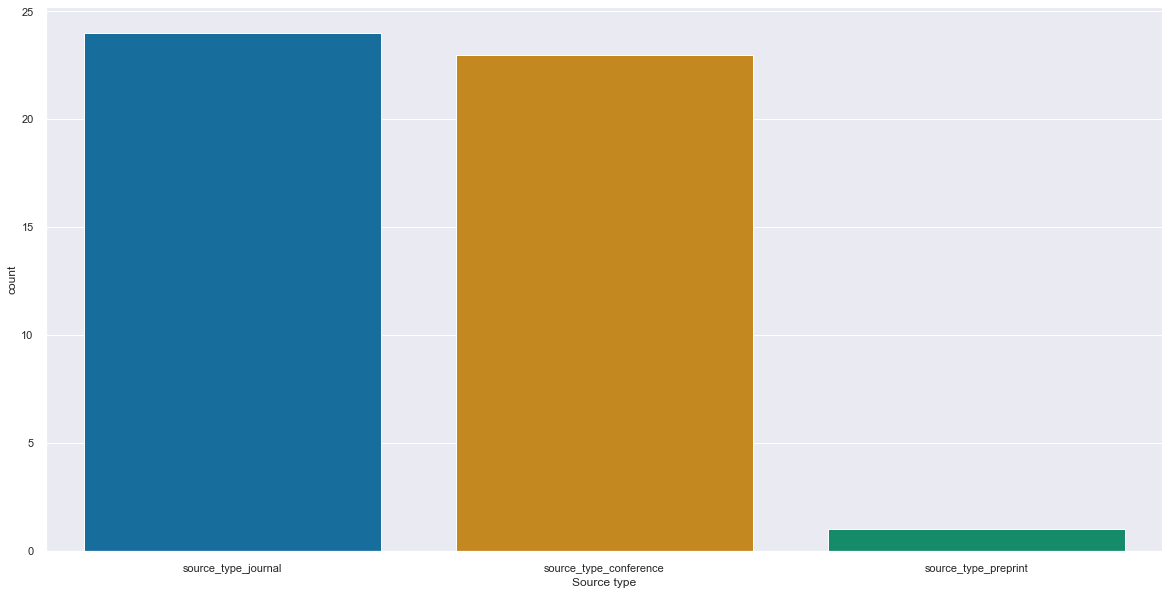

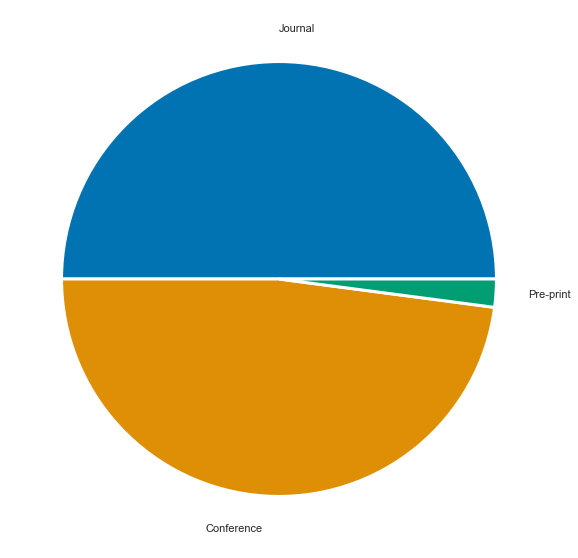

In [155]:
df_metadata=df_metadata.fillna('-')
df_metadata_sin_duplicates = df_metadata.drop_duplicates(subset='paper_id')

df_sources = df_metadata_sin_duplicates.iloc[:,7:10]
def get_value(row):
     for c in df_sources.columns:
         if row[c]== 'x':
             return c

df_sources = df_sources.apply(get_value, axis=1)
df_sources = pd.DataFrame(df_sources)
df_sources.columns = ['Source type']


#ploteo
quantity = df_sources['Source type'].value_counts()
df_quantity = pd.DataFrame(quantity)

plt.rcParams['figure.figsize'] = [20, 10]
sns.set_style("darkgrid")
sns.set_palette('colorblind')
sns.countplot(x='Source type', data=df_sources)
plt.show()


#pie plot
sns.set_style("darkgrid")
sns.set_palette('colorblind')
names = 'Journal', 'Conference', 'Pre-print'
plt.pie(df_quantity['Source type'], labels = names, labeldistance = 1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.show()


# 2. Gráfico de barras papers por país y continente
Interpretación: primacía de trabajos provenientes de China y Asia. Seguidos estos por trabajos europeos.

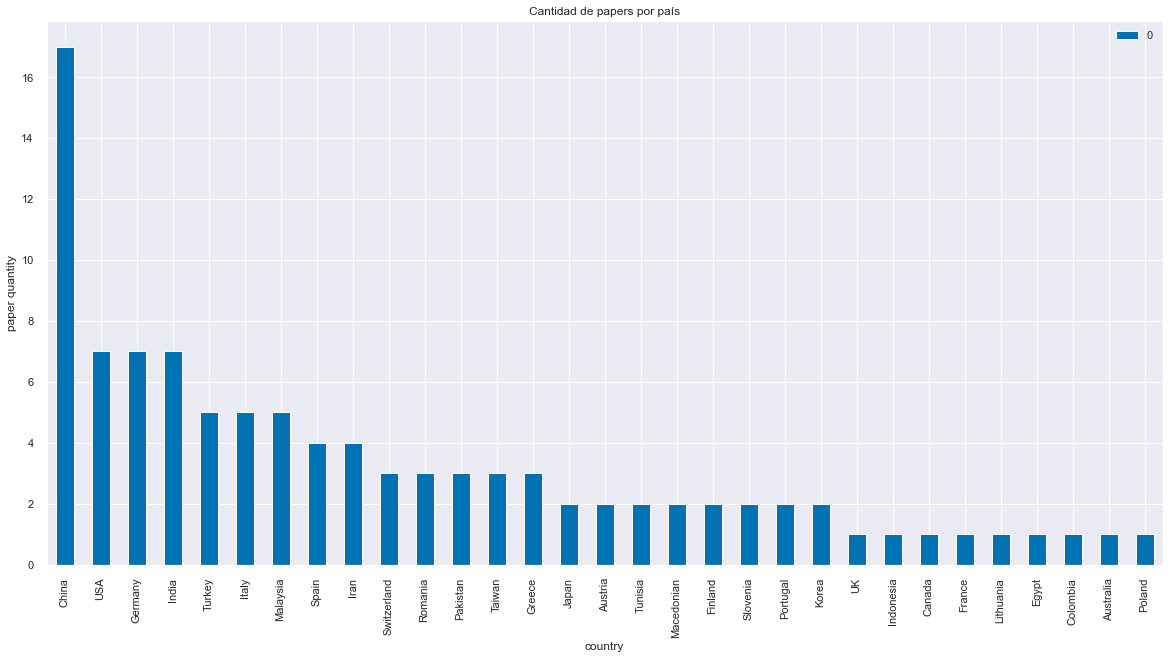

  continents  quantity
0       Asia        49
1     Europa        39
2    America         9
3     Africa         3
4  Australia         1


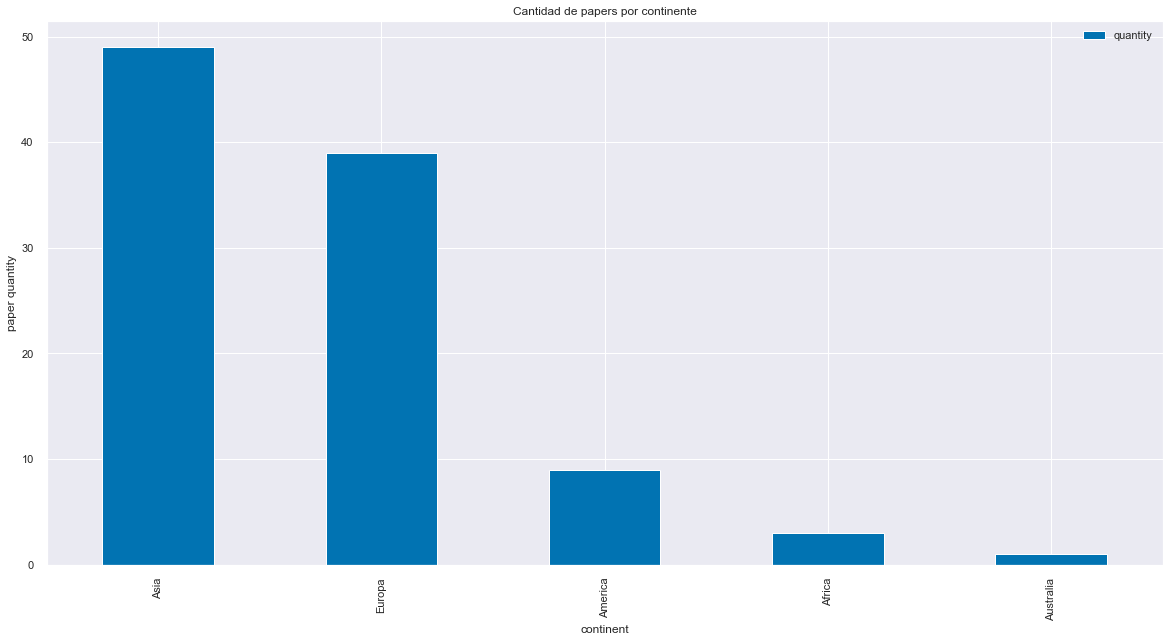

In [156]:
paises = df_metadata_sin_duplicates["first_author_country_affiliation"].unique()

countries = df_metadata_sin_duplicates.pivot_table(columns=['first_author_country_affiliation'], aggfunc='size')
df_countries = pd.DataFrame(countries)

order = ['China','USA', 'Germany', 'India','Turkey','Italy', 'Malaysia','Spain','Iran', 'Switzerland','Romania','Pakistan', 'Taiwan','Greece', 'Japan',
'Austria', 'Tunisia','Macedonian', 'Finland', 'Slovenia', 'Portugal', 'Korea',
'UK', 'Indonesia','Canada', 'France', 'Lithuania', 
'Egypt','Colombia', 'Australia', 'Poland']

df_countries.loc[order].plot(kind='bar', title='Cantidad de papers por país', xlabel='country', ylabel='paper quantity')
plt.show()

#Papers por continente - plot
papers_continents = {'continents' : ['Asia', 'Europa','America','Africa','Australia'],
'quantity' : [49, 39, 9, 3, 1]}
df_continents = pd.DataFrame(papers_continents)
print(df_continents)

df_continents.set_index('continents').plot(kind='bar', title='Cantidad de papers por continente', xlabel='continent', ylabel='paper quantity')
plt.show()


## Grafico base de datos

Incluir en un grafico, dentro de las bases de datos publicas, cada base de dato publica (AMIGOS, MAHNOB, etc.)
- cantidad total de papers: 101
- db publicas : 
- DEAP 10
- MAHNOB 7
- AMIGOS 7
- PMEmo 3
- Ascertein 2
- RECOLA 2
- Otros 7
db privadas : 